## Анализ оттока клиентов банка «Метанпром»

Нам поступила задача от регионального банка «Метанпром» на анализ оттока клиентов. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Анализ покажет, как клиенты пользуются услугами, а так же поможет составить портрет клиентов, которые склонны уходить из банка.

По итогам исследования нужно будет подготовить презентацию, чтобы отразить основные выводы, которые помогут менеджерам банка увидеть ясную картину. Помимо этого составим ряд рекомендаций по уменьшению оттока клиентов, в том числе по созданию и предложению новых продуктов.

Также потребуется создать дашборд, который будет в себе содержать:
- диаграмму, отображающую распределение заработной платы клиентов;
- индикатор, отображающий процент клиентов, имеющих кредитную карту;
- фильтр, позволяющий выбрать ушёл клиент или нет.

**Цель работы:**
- выявить прогноз вероятности оттока клиентов;
- сформировать типичные портреты клиентов, в том числе выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания, по каждому сегменту.

**Ход работы:**

Все необходимые данные получим из файла `bank_dataset.csv`. Нам понадобится для начала изучение общей информации, так как сейчас нет информации о качестве данных. Проверим данные на наличие всевозможных неточностей, которые могут помешать правильным результатам. Затем проведем исследовательский анализ данных (EDA), построим модель прогнозирования оттока клиентов и сделаем кластеризацию клиентов. В итоге сформулируем вывод и подготовим рекомендации по работе с клиентами.

Таким образом, вся работа пройдет в пять шагов:

1. Загрузка данных и изучение общей информации.
2. Исследовательский анализ данных (EDA).
3. Модель прогнозирования оттока клиентов.
4. Кластеризация клиентов. 
5. Общий вывод и рекомендации.

⚠️

Импортируем сразу же нужные библиотеки, затем в процессе будем добавлять при необходимости и другие:

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

### 1. Загрузка данных и изучение общей информации

Начнем работу с загрузки данных из файла. Изучим общую информацию и ознакомимся с данными.

---

Загружаем файл с данными отсюда `/datasets/bank_dataset.csv`, сохраняем его в переменную `df`. Сразу выведем случайные десять строк таблицы, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого вызовем функцию `sample()` с параметром `random_state`

In [2]:
df = pd.read_csv('/datasets/bank_dataset.csv')
display(df.sample(n = 10, random_state = 1))

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9953,15698688,550,Ярославль,М,47,2,NaN,2,1,1,97057.28,0
3850,15818029,680,Ярославль,М,34,3,143292.95,1,1,0,66526.01,0
4962,15707824,531,Ярославль,Ж,42,2,NaN,2,0,1,90537.47,0
3886,15763677,710,Ростов Великий,М,34,8,147833.30,2,0,1,1561.58,0
5437,15776212,543,Ростов Великий,М,30,6,73481.05,1,1,1,176692.65,0
8517,15714536,688,Ярославль,М,20,8,137624.40,2,1,1,197582.79,0
2041,15752582,840,Ярославль,Ж,39,1,94968.97,1,1,0,84487.62,0
1989,15665190,695,Рыбинск,М,28,0,96020.86,1,1,1,57992.49,0
1933,15858296,666,Ростов Великий,М,74,7,105102.50,1,1,1,46172.47,0
9984,15738911,602,Ростов Великий,М,35,7,90602.42,2,1,1,51695.41,0


На первый взгляд не видно чего-то аномального или неправильного, лишь пропуски в столбце `Balance` бросаются в глаза и отсутствие «змеиного регистра» в названиях некоторых столбцов, но всем этим мы займемся позднее.  Познакомимся с данными при помощи вызова `info()`, изучим их. В том числе посмотрим на типы данных, количество столбцов и строк

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Файл `bank_dataset.csv` содержит данные о клиентах банка «Метанпром». Всего в таблице 12 столбцов и 10 000 строк. Типы данных: `float`, `int` и `object`. Согласно документации к данным:
- `userid` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `City` — город;
- `Gender` — пол;
- `Age` — возраст;
- `Objects` — количество объектов в собственности;
- `Balance` — баланс на счёте;
- `Products` — количество продуктов, которыми пользуется клиент;
- `CreditCard` — есть ли кредитная карта;
- `Loyalty` — активный клиент;
- `estimated_salary` — заработная плата клиента;
- `Churn` — ушёл или нет.

Ранее заметили пропущенные значения, но теперь видим, что их очень много. В следующем шаге изучим их более детально, сделаем предположение о причинах их появления и будем принимать решение. Типы данных правильные, в них ничего менять не нужно.

**Вывод по шагу:**

Мы загрузили данные и провели с ними первичное ознакомление. Выяснили, что у нас всего в таблице 12 столбцов и 10 000 строк. Типы данных: float, int и object. Уже на этом этапе заметили моменты, которые стоит оптимизировать в следующем шаге. 

### 2. Исследовательский анализ данных (EDA)

В рамках исследовательского анализа данных (EDA):
- поищем недочеты в данных и при необходимости устраним их, в том числе оптимизируем ранее обнаруженные моменты;
- изучим сводную информацию;
- изучим средние значения признаков для групп с оттоком и без;
- построим графики распределения признаков в разрезе оттока;
- построим матрицу корреляций и отобразим её;
- проверим гипотезы. 

---

#### 2.1 Оптимизация данных

Приведем в порядок названия столбцов, сделав их по правилу «змеиного регистра»

In [4]:
df.columns = [x.lower() for x in df.columns.values]

Проверим, есть ли в данных дубликаты

In [5]:
df.duplicated().sum()

0

Убедимся в том, что в значениях столбцов `city` и `gender` все в порядке в плане уникальности

In [6]:
display(df['city'].unique())
display(df['gender'].unique())


array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

array(['Ж', 'М'], dtype=object)

И что в столбце `userid` каждый идентификатор пользователя уникален

In [7]:
df['userid'].value_counts().sum()

10000

Ранее заметили, что в данных очень много пропущенных значений. Выясним, сколько это в процентах и по количеству

In [8]:
pd.DataFrame(round((df.isna().mean() * 100), 2)).style.background_gradient()

,0
userid,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
objects,0.000000
balance,36.170000
products,0.000000
creditcard,0.000000
loyalty,0.000000


In [9]:
df['balance'].isna().sum()

3617

Посмотрим более детально на информацию по этому столбцу

In [10]:
df['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Мы имеем 3617 пропущенных значений, что является 36% от общего количества строк в данных. Больше трети, очень много. Просто удалить их нельзя. Наличие пропусков может быть обусловлено ошибкой при выгрузке данных, что побуждает вопросы к тем, кто их выгружал, но есть нюанс. Не каждый клиент в банке имеет депозитные счета, некоторые пользуются исключительно кредитными продуктами, поэтому у нас есть основание полагать, что пропущенные значения это фактически нули, ведь никакого баланса у этих клиентов нет.

Дополнительно метод `describe()` показал, что в остальных значениях вообще нет нулей, то есть минимальное в столбце не равно нулю. В таком случае можем предположить, что все-таки могла быть и ошибка при выгрузке данных, которая перевела все нули в пропущенные значения. Тем более, что даже у клиентов с депозитными счетами бывает нет денег на балансе по различным причинам, особенно у тех, кто вывел все деньги и просто держит счета открытыми. В любом случае, оба предположения указывают на то, что вместо пропущенных значений определенно должны быть нули. 

В связи с этим, заменим пропущенные значения на нули. 

In [11]:
df['balance'] = df['balance'].fillna(0)

Теперь убедимся в том, что оптимизация прошла успешно

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Вывод:**

Мы поискали недочеты в данных и устранили их, в том числе оптимизировали ранее обнаруженные моменты, а именно:
- привели названия столбцов к «змеиному регистру»;
- выяснили, что дубликатов нет;
- убедились в уникальности значений в соответствующих столбцах;
- выдвинули возможные причины появления пропущенных значений и приняли решение заполнить их нулями.

#### 2.2 Изучение сводной информации и расчеты

Посмотрим на числовое описание данных, за исключением столбца `userid`, так как это просто идентификаторы пользователей, при помощи метода `describe()` и сделаем соответствующие выводы

In [13]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.loc[:, df.columns != 'userid'].describe().T

,count,mean,std,min,25%,50%,75%,max
score,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
products,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
creditcard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
churn,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


Видим, что:
- максимальный скоринговый балл равен 850, а минимальный 350. Медиана равна 650, почти столько же, сколько и среднее - примерно 650;
- максимальный возраст равен 92 годам, а минимальный 18 лет. Медиана равна 37 годам, а среднее значение почти 39 лет;
- у клиентов есть максимум 10 объектов недвижимости, минимум - 0. Медиана и среднее равны 5;
- на балансе максимум почти 251 000 у. е., минимум - 0 у. е. Медиана в районе 97 000 у. е., а среднее чуть больше 76 000 у. е.;
- максиумум бывает 4 продукта, видимо это обусловлено максимальным количеством продуктов банка, а минимум - 1. Медиана равняется 1, а среднее чуть больше 1.5;
- больше 70% клиентов имеют кредитную карту;
- чуть больше половины клиентов из выборки являются активными;
- максимальная заработная плата почти 200 000 у. е., а минимальная почти 12 у. е. Медиана в районе 100 000 у. е., как и среднее значение;
- 20% клиентов ушли в отток, остальные остались.

Отдельно посмотрим на столбцы с типом данных `object`

In [14]:
df['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

В датасете больше всего клиентов из Ярославля, остальные клиенты из Ростова Великого и Рыбинска, их почти поровну. 

In [15]:
df['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

В датасете больше мужчин, чем женщин, но не так уж сильно. 

Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Воспользуемся методом `groupby()` и исключим столбец `userid`

In [16]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df.loc[:, df.columns != 'userid'].groupby('churn').agg('mean').T

churn,0,1
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,"72,745.30","91,108.54"
products,1.54,1.48
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,"99,738.39","101,465.68"


Видим, что:
- у обеих групп почти одинаковый средний показатель скоринга;
- в оттоке клиенты в среднем на 7 лет старше, чем те, кто остался;
- количество недвижимости в собственности в двух группах почти одинаковое;
- баланс отличается, у клиентов из группы оттока баланс в среднем почти на 20 000 у. е. больше;
- количество продуктов в банке почти равное в обеих группах, в среднем примерно 1.5 продукта;
- наличие кредитной карты тоже почти равное в обеих группах;
- закономерно, что в группе оттока меньше тех клиентов, которые помечены активными;
- средняя заработаная плата в двух группах примерно одинакова, в районе 100 000 у. е.

**Вывод:**

Мы изучили числовое описание данных. В них не заметно каких-либо сильных выбросов или отклонений, все выглядит реально и уместно. Модель скоринга, как правило, имеет максимальный порог в 1 000 баллов, а низкие показатели могут быть связаны с плохой кредитной историей. Возраст не выбивается, цифры реальные. В остальном показатели тоже адекватные, в их качестве нет сомнений. 

Также изучили средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Наибольшую разницу наблюдаем в возрасте, балансе и активности. 

#### 2.3 Построение графиков распределения признаков

Построим графики распределения признаков в разрезе оттока

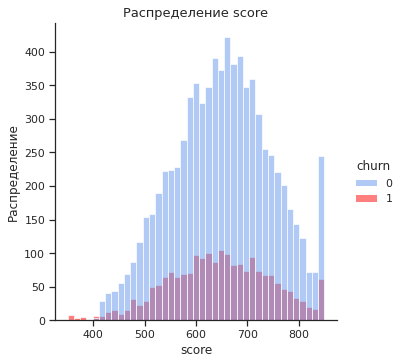

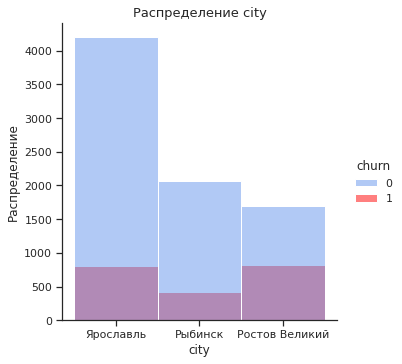

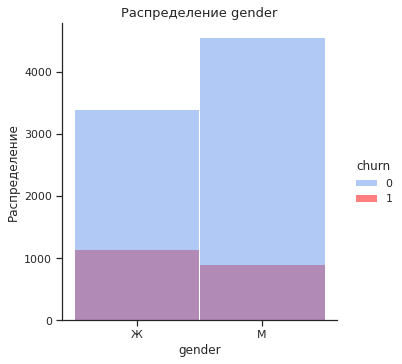

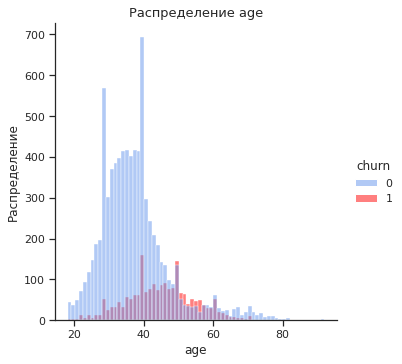

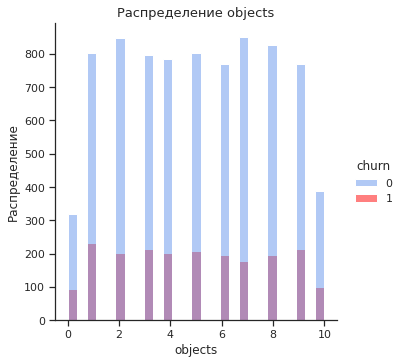

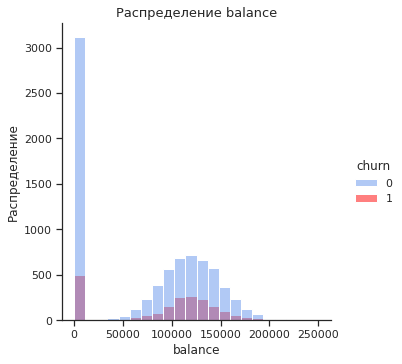

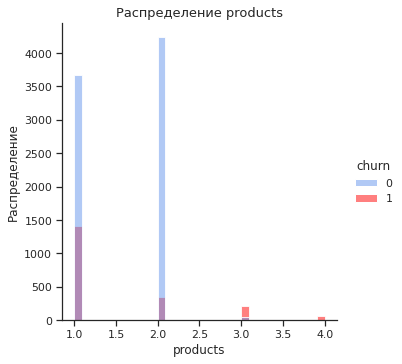

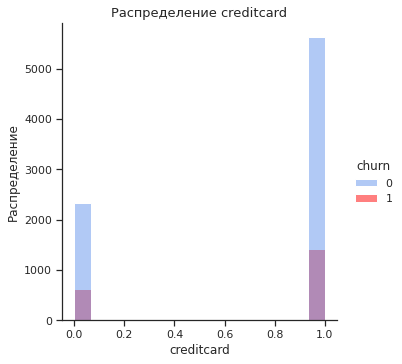

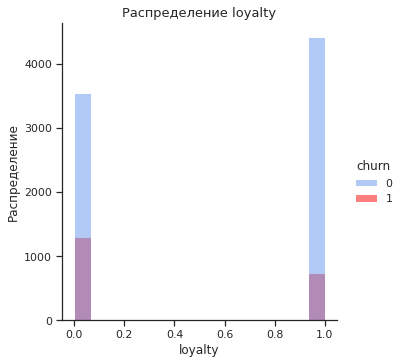

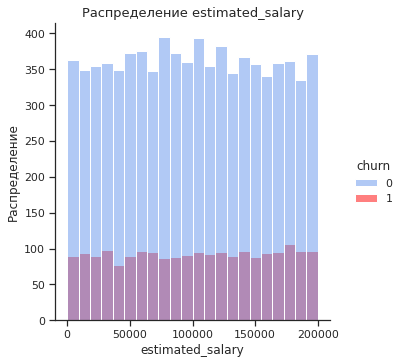

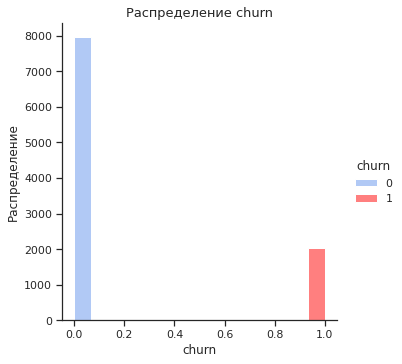

In [17]:
sns.set_theme(style = "ticks")
sns.set_palette(['cornflowerblue', 'red'])

def function_hist(data, column):
    sns.displot(data,x = column, hue = 'churn')
    plt.title('Распределение '+ name, fontsize = 13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()
    
for name in df.columns[1::]:
    function_hist(df, name)

**Вывод:**

Мы построили графики распределения признаков в разрезе оттока. В целом, можем сказать, что на данном этапе мы благодаря визуализации фактически более детально рассмотрели и увидели те выводы, которые сделали на предыдущем этапе при изучении средних значений признаков в двух группах. 

Из особенностей отметим, что:
- в Ростове Великом отток преобладает, от общего количества ушла половина;
- женщины уходят чаще мужчин, даже с учетом того, что их среди клиентов меньше;
- чаще уходят те, у кого всего один продукт, а с тремя и четырьмя продуктами ушли почти все, что странно;
- клиенты с кредиткой уходят почаще, возможно, что их банально не устраивают условия, либо они в них не разобрались.

#### 2.4 Построение матрицы корреляций

Построим матрицу корреляций и отобразим её, чтобы определить признаки, которые сильнее всего влияют на отток

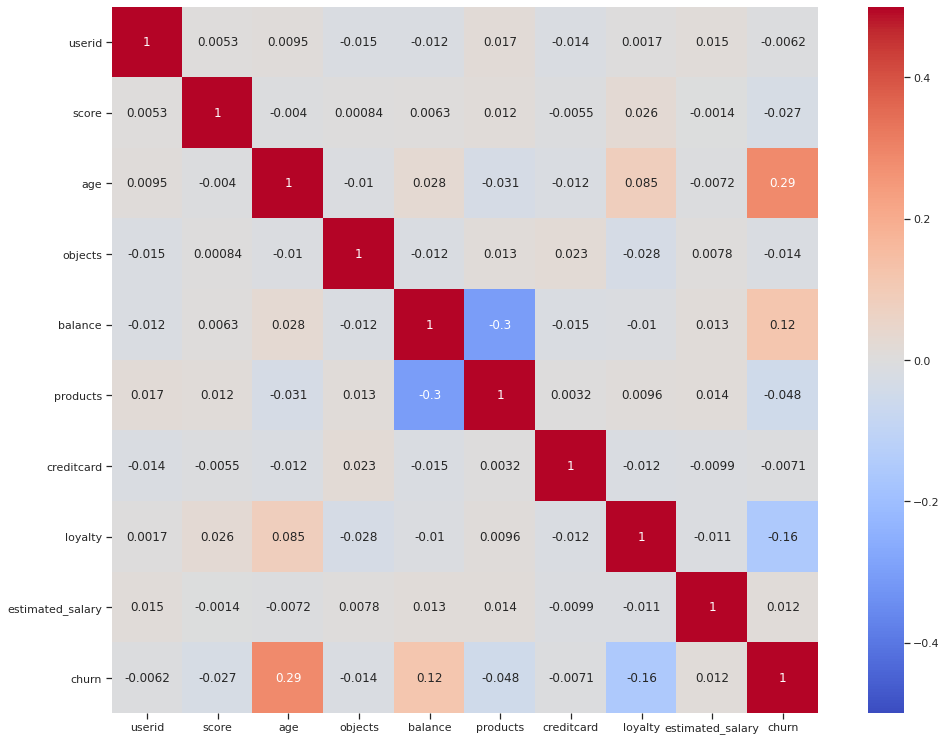

In [18]:
cm = df.corr()
plt.figure(figsize = (18, 13))
sns.heatmap(cm, annot = True, square = True, vmin = -0.5, vmax = 0.5, cmap = 'coolwarm')
plt.show()

**Вывод:**

Наибольшую корреляцию к оттоку имеют:
- `age` 0.29;
- `balance` 0.12;
- `loyality` -0.16.

В принципе, матрица корреляций лишь подтвердила то, что мы заметили в предыдущих двух пунктах, что-то дополнительно выяснять в этом направлении не нужно.

#### 2.5 Проверка гипотез

И напоследок в этом шаге проверим гипотезы:

- средний доход между клиентами обеих групп различается;
- средний возраст между клиентами обеих групп различается;

Пороговое значение `alpha` зададим самостоятельно.

---

##### 2.5.1 Гипотеза различия среднего дохода между клиентами обеих групп

Формируем гипотезы:
- H0 — средний доход между клиентами обеих групп равен;
- H1 — средний доход между клиентами обеих групп различается.

Формируем выборки, задаем уровень критерия статистической значимости, количество тестов, рассчитываем итоговый уровень критерия статистической значимости с учетом поправки Бонферрони и в конце сравниваем полученное значение с критерием

In [19]:
sample_A = df.query('churn == 0')['estimated_salary']
sample_B = df.query('churn == 1')['estimated_salary']

alpha = 0.05

n_test = 4

alpha_corr = alpha / n_test

result = st.mannwhitneyu(sample_A, sample_B)
p_value = result.pvalue
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, то есть статистически значимых различий между средними двух выборок нет. Дополнительно посмотрим на относительную разницу средних

In [20]:
print('{0:.2%}'.format(sample_B.mean() / sample_A.mean() - 1))

1.73%


Как видим, полученное значение лишь подтверждает результат теста, так как относительная разница средних очень мала. 

##### 2.5.1 Гипотеза различия среднего возраста между клиентами обеих групп

Формируем гипотезы:
- H0 — средний возраст между клиентами обеих групп равен;
- H1 — средний возраст между клиентами обеих групп различается.

Формируем выборки и в конце сравниваем полученное значение с критерием

In [21]:
sample_A = df.query('churn == 0')['age']
sample_B = df.query('churn == 1')['age']

result = st.mannwhitneyu(sample_A, sample_B)
p_value = result.pvalue
if p_value > alpha_corr:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, то есть статистически значимые различия между средными двух выборок есть. Дополнительно посмотрим на относительную разницу средних

In [22]:
print('{0:.2%}'.format(sample_B.mean() / sample_A.mean() - 1))

19.86%


Как видим, полученное значение лишь подтверждает результат теста, так как относительная разница средних довольно таки велика.

**Вывод:**

В этом пункте мы проверили гипотезы и выяснили, что:
- средний доход между клиентами обеих групп не различается;
- средний возраст между клиентами обеих групп различается.

---

**Вывод по шагу:**

Мы провели исследовательский анализ данных (EDA), в рамках которого оптимизировали набор данных и нашли определенные особенности, сделали выводы:
- наибольшую разницу между двумя группами заметили в возрасте, балансе и активности, что лишь подтвердила матрица корреляций;
- в Ростове Великом отток преобладает, от общего количества ушла половина;
- женщины уходят чаще мужчин, даже с учетом того, что их среди клиентов меньше;
- чаще уходят те, у кого всего один продукт, а с тремя и четырьмя продуктами ушли почти все, что странно;
- клиенты с кредиткой уходят почаще, возможно, что их банально не устраивают условия, либо они в них не разобрались;
- средний доход между клиентами обеих групп не различается;
- средний возраст между клиентами обеих групп различается.

### 3. Модель прогнозирования оттока клиентов

Построим модель прогнозирования оттока клиентов:
- разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`;
- обучим модель на train-выборке двумя способами;
 - логистической регрессией,
 - случайным лесом.
- оценим метрики `accuracy`, `precision` и `recall` для обеих моделей на валидационной выборке, а также сравним по ним модели;
- выясним, какая модель показала себя лучше на основании метрик.

---

Подготовим новый датасет, в котором преобразуем категориальные переменные в горячую кодировку, это позволит провести обучение. Помимо прочего разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`

In [23]:
df_ml = df[df.columns[1::]]
df_ml = pd.get_dummies(df_ml[df.columns[1::]]) 

X = df_ml[df_ml.columns[1::]].drop(columns = 'churn')
y = df_ml['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

Создадим функцию, которая тренирует модель на стестовых данных и рассчитывает все необходимые метрики

In [24]:
def train_model(m):
    print(m)
    model = m
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    print('Accuracy', accuracy_score(y_test, y_pred), 
         '\nRecall', recall_score(y_test, y_pred),
         '\nPrecision', precision_score(y_test, y_pred),'\n')
    
for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression()
Accuracy 0.8125 
Recall 0.23209876543209876 
Precision 0.5949367088607594 

RandomForestClassifier()
Accuracy 0.864 
Recall 0.5259259259259259 
Precision 0.726962457337884 



`Accuracy` наиболее высокая у обеих моделей, но это обусловлено тем, что данные распределены неравномерно, ведь клиентов в оттоке всего 20%, что мы узнали еще в пункте 2.2. 

Наиболее важной метрикой здесь будет `recall`. В случае со случайным лесом она в два раза больше, чем при логистической регрессии, но по прежнему не велика. В связи с этим можно сделать вывод, что на имеющихся данных мы можем обучить только слаботочные модели, для более точного результата нужно больше данных. 

**Вывод по шагу:**

Мы построили модель прогнозирования оттока клиентов, а именно:
- разбили данные на обучающую и валидационную выборку функцией `train_test_split()`;
- обучили модель на train-выборке двумя способами;
 - логистической регрессией,
 - случайным лесом.
- оценили метрики `accuracy`, `recall` и `precision` для обеих моделей на валидационной выборке, а также сравнили по ним модели;
- выяснили, что на имеющихся данных мы можем обучить только слаботочные модели, для более точного результата нужно больше данных.

### 4. Кластеризация клиентов

Процесс кластеризации клиентов выстроим вот так:
- подготовим и стандартизируем данные, затем нарисуем дендрограмму;
- обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов;
- построим распределения признаков для кластеров, посмотрим на средние значения признаков для кластеров и выявим заметные особенности;
- для каждого полученного кластера посчитаем долю оттока методом `groupby()` и выясним, отличаются ли они по доле оттока, а также какие кластеры склонны к оттоку, а какие — надёжны.

---

Подготовим и стандартизируем данные, затем нарисуем дендрограмму

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

plt.figure(figsize = (15, 10))  
dendrogram(linked, orientation = 'top')
plt.show()

График показывает, что явно выделены 4 кластера. Теперь обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [ ]:
km = KMeans(n_clusters = 4, random_state = 0)

labels = km.fit_predict(X_sc)

Сохраним метки кластера в наш датасет. Затем сразу построим распределения признаков для кластеров, посмотрим на средние значения признаков для кластеров и выявим заметные особенности

In [ ]:
df_mean = df.drop(columns = ['userid'])

df_mean['cluster'] = labels

df_mean.groupby('cluster').agg('mean').T

И визуализируем это дело

In [ ]:
for value in [0, 1, 2, 3]:
    df_mean[df_mean['cluster'] == value].hist(figsize = (17, 10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Касаемо наблюдаемых особенностей:
- в 0 кластере самые взрослые клиенты, в среднем почти 40 лет, у которых самый большой показатель среднего баланса из всех кластеров, причем в 2 раза, но при этом средний показатель оттока у них выше, чем во всех остальных кластерах;
- в 1 кластере второй показатель по среднему оттоку, при этом в остальном каких-то явных отличий от последних двух кластеров нет, только разница в 2 по балансу с первым кластером;
- во 2 и 3 кластерах средние показатели почти идентичны с 1, но менее подвержены оттоку. Причем 2 кластер имеет самый низкий средний показатель оттока и у него в среднем самые молодые клиенты, им чуть больше 38 лет.

Для каждого полученного кластера мы уже видим долю оттока, основываясь на информации выше. Там же видим, что кластеры отличаются по доле оттока, какие-то менее склонны к оттоку, а какие-то наоборот. На всякий случай отдельно посчитаем доли, дабы посмотреть на них без награмождений

In [ ]:
churn_share = df_mean.groupby('cluster')['churn'].agg('sum') / df_mean.groupby('cluster')['churn'].size()
display(churn_share)

0 и 1 кластеры наиболее склонны к оттоку, а 2 и 3 кластеры более надежды в этом плане.

**Вывод по шагу:**

Мы выполнили кластеризацию клиентов, а именно:
- стандартизировали данные;
- построили матрицу расстояний на стандартизированной матрице признаков и нарисовали дендрограмму, а также выделили 4 кластера;
- обучили модель кластеризации на основании алгоритма `K-Means` и спрогнозировали кластеры клиентов;
- построили распределения признаков для кластеров, изучили средние значения признаков для кластеров и описали выявленные заметные особенности по каждому кластеру;
- для каждого кластера посчитали долю оттока и выяснили, что различия здесь есть. 0 и 1 кластеры наиболее склонны к оттоку, а 2 и 3 кластеры более надежды в этом плане.

### 5. Общий вывод и рекомендации

Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания, по каждому сегменту. Выделим несколько важных принципов и примеров их реализации в виде определённых маркетинговых действий. 

---

#### 5.1 Основные выводы 

Мы закончили работу, строго следуя изначально установленному ходу работы:
- загрузили необходимые данные и изучили их;
- провели исследовательский анализ данных (EDA), в рамках которого оптимизировали данные и узнали, у клиентов с какими параметрами наиболее выражена вероятность оттока. В этом нам помогло изучение сводной информации, графики распределения признаков и матрица корреляций. Помимо этого проверили гипотезы и выяснили, что средний доход между клиентами обеих групп не различается, а средний возраст между клиентами обеих групп различается;
- построили модель прогнозирования оттока клиентов и выяснили, что на имеющихся данных мы можем обучить только слаботочные модели, для более точного результата нужно больше данных;
- произвели кластеризацию клиентов, которая позволила взглянуть на данные под новым углом. Установили 4 основных кластера, обучили модель кластеризации на основании алгоритма `K-Means` и спрогнозировали кластеры клиентов. Отобразили выявленные особенности по каждому кластеру и посчитали долю оттока. 

Оказалось, что 0 и 1 кластеры наиболее склонны к оттоку, а 2 и 3 кластеры более надежды в этом плане.

Если углубиться в признаки, то следует, что наиболее склонны к оттоку клиенты:
- имеющие один продукт, либо три и четыре продукта
- которые старше по возрасту;
- живущие в Ростове Великом;
- имеющие кредитную карту;
- которые менее активны;
- женского пола.

Наиболее точно к этим признакам как раз подходят кластеры 0 и 1, остальные кластеры, соответственно, наоборот. То есть, на эти признаки стоит обращать внимание у клиентов, чтобы принимать своевременные и эффективные меры по предотвращению оттока. 

#### 5.2 Рекомендации

По результатам анализа сложно давать какие-то рекомендации, так как некоторые признаки вообще почти не отличаются, но небольшие зацепки все-таки есть. Необходимо ориентироваться на признаки 2 и 3 кластера, а также мотивировать клиентов в тех направлениях, которые влияют на их отток.

Маркетинговому отделу, в синергии с другими нужными отделами, необходимо:
- реализовать лояльные, но при этом выгодные банку, кампании по продвижению кредитных продуктов, так как они скорее будут удерживать клиентов длительное время, но за исключением кредитных карт, их могут брать на маленький срок, и как показал анализ, клиенты с кредитками чаще уходят;
- разработать, либо продвигать уже имеющийся инвестиционный продукт, который будет напрямую завязан с депозитным счетом, в том числе в плане пополнений и вывода денег, чтобы клиенты были всегда активными и не были склонны к оттоку. Инвестиционный продукт как раз должен быть интересен людям старшего возраста, чтобы обеспечить себе стабильность в плане финансов, но при этом он должен быть простым в использовании, чтобы им могла воспользоваться даже женщина, тогда и в направлении этого признака можно будет улучшить показатели;
- часть этих нововведений направить на клиентов из Ростова Великого, чтобы снизить процент оттока в этом городе;
- подготовить маркетинговые акции, которые будут содержать в себе активные действия с какими-либо бонусами для клиентов, что побудит их к естественной активности, а активный клиент, как мы выяснили - наименее склонен к оттоку;
- по возможности реализовать долгосрочные вклады с наиболее выгодными условиями, чтобы у клиентов было желание держать деньги в банке и использовать его как основной, что зачастую мотивирует на открытие других продуктов этого же банка. 

Конечно, без базового клиентского обслуживания никуда. Помимо всего этого, банк должен качественно взаимодействовать с клиентами по различным каналам связи, в том числе в социальных медиа и своем приложении.